In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [15]:
# Load the data from the assets folder

rain_data = pd.read_csv('../assets/rain_data.csv')
print(f'Shape of the data: {rain_data.shape}')
rain_data.head()

Shape of the data: (67021, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
1,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
2,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
3,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
4,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes


# Preprocessing

In [16]:
print(rain_data.dtypes)
rain_data.describe()

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,65864.000000,65940.000000,64271.000000,37591.000000,34831.000000,61576.000000,65971.000000,65328.000000,65257.000000,64388.000000,59750.000000,59761.000000,41303.000000,40071.000000,65689.000000,64811.000000
mean,12.552091,22.480866,3.669512,5.122383,6.514499,42.142150,14.634764,19.187194,72.074781,57.521433,1016.524147,1014.237604,5.053870,5.184148,16.888700,20.822340
std,6.371143,7.108686,10.981571,3.950017,3.932475,14.638665,9.227585,9.171806,18.481003,21.741282,7.343975,7.283068,2.778949,2.620094,6.427827,6.931696
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,8.000000,17.200000,0.000000,2.400000,3.200000,31.000000,7.000000,13.000000,61.000000,42.000000,1011.700000,1009.300000,2.000000,3.000000,12.200000,15.800000
50%,12.300000,21.800000,0.000000,4.400000,6.800000,41.000000,13.000000,19.000000,74.000000,58.000000,1016.500000,1014.200000,6.000000,6.000000,16.500000,20.100000
75%,17.200000,27.400000,2.200000,7.000000,9.900000,50.000000,20.000000,24.000000,87.000000,73.000000,1021.500000,1019.200000,7.000000,7.000000,21.400000,25.500000
max,33.900000,47.300000,371.000000,77.300000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1040.300000,1038.500000,8.000000,8.000000,39.000000,46.700000


In [17]:
# Create new variable from the date column

rain_data['Date'] = pd.to_datetime(rain_data['Date'])
rain_data['Month'] = rain_data['Date'].dt.month
rain_data['Day'] = rain_data['Date'].dt.day
rain_data['Year'] = rain_data['Date'].dt.year
rain_data.drop('Date', axis=1, inplace=True)

# Missing values

,missing_values,percent_missing %,data type
Location,0,0.000000,object
MinTemp,1157,1.726325,float64
MaxTemp,1081,1.612927,float64
Rainfall,2750,4.103192,float64
Evaporation,29430,43.911610,float64
Sunshine,32190,48.029722,float64
WindGustDir,5487,8.186986,object
WindGustSpeed,5445,8.124319,float64
WindDir9am,4751,7.088823,object
WindDir3pm,2288,3.413855,object


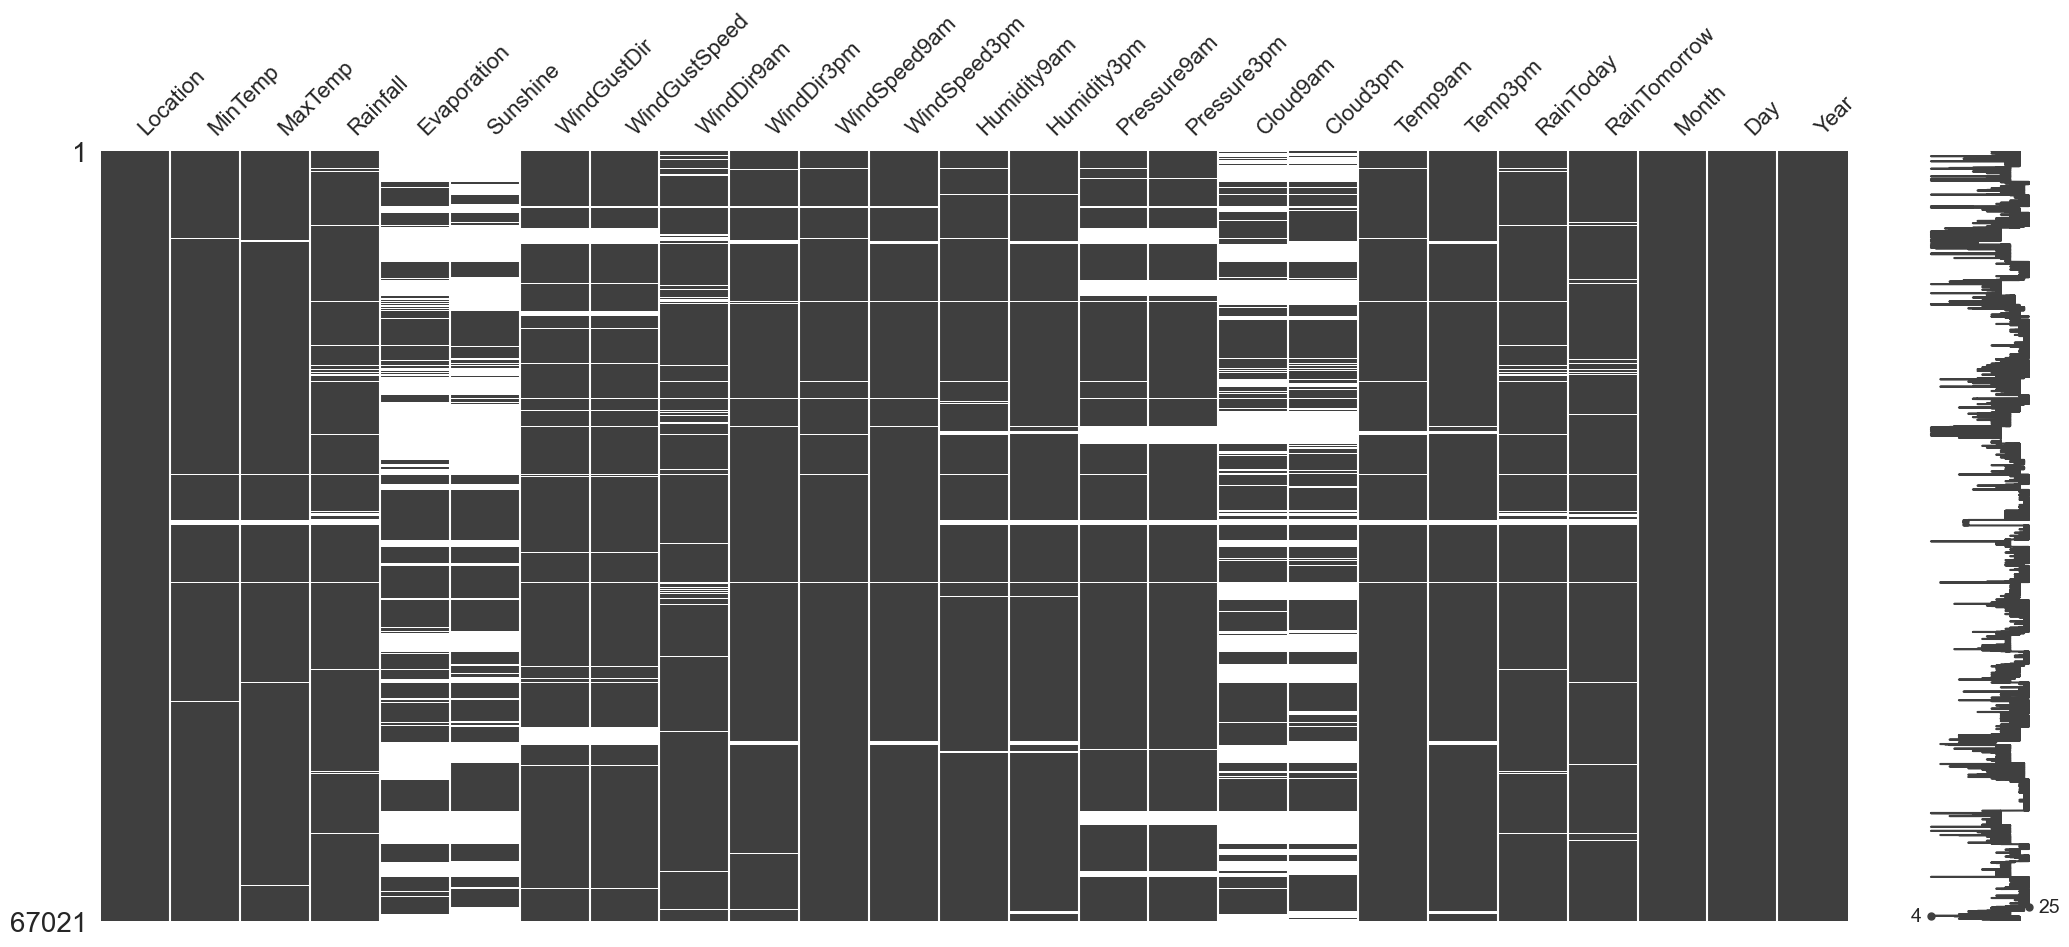

In [18]:
import missingno as msno

# Visualize the missing values as a matrix

msno.matrix(rain_data)

def create_missing_data_frame():
    # Create a table with data missing 
    missing_values=rain_data.isnull().sum() # missing values

    percent_missing = rain_data.isnull().sum()/rain_data.shape[0]*100 # missing value %

    value = {
        'missing_values ':missing_values,
        'percent_missing %':percent_missing , 
        'data type' : rain_data.dtypes
    }
    frame=pd.DataFrame(value)
    return frame

missing_data=create_missing_data_frame()
missing_data

Shape of the data: (45166, 25)


,missing_values,percent_missing %,data type
Location,0,0.000000,object
MinTemp,728,1.611832,float64
MaxTemp,722,1.598548,float64
Rainfall,1491,3.301156,float64
Evaporation,7575,16.771465,float64
Sunshine,10335,22.882257,float64
WindGustDir,3286,7.275384,object
WindGustSpeed,3262,7.222247,float64
WindDir9am,2247,4.974981,object
WindDir3pm,1005,2.225125,object


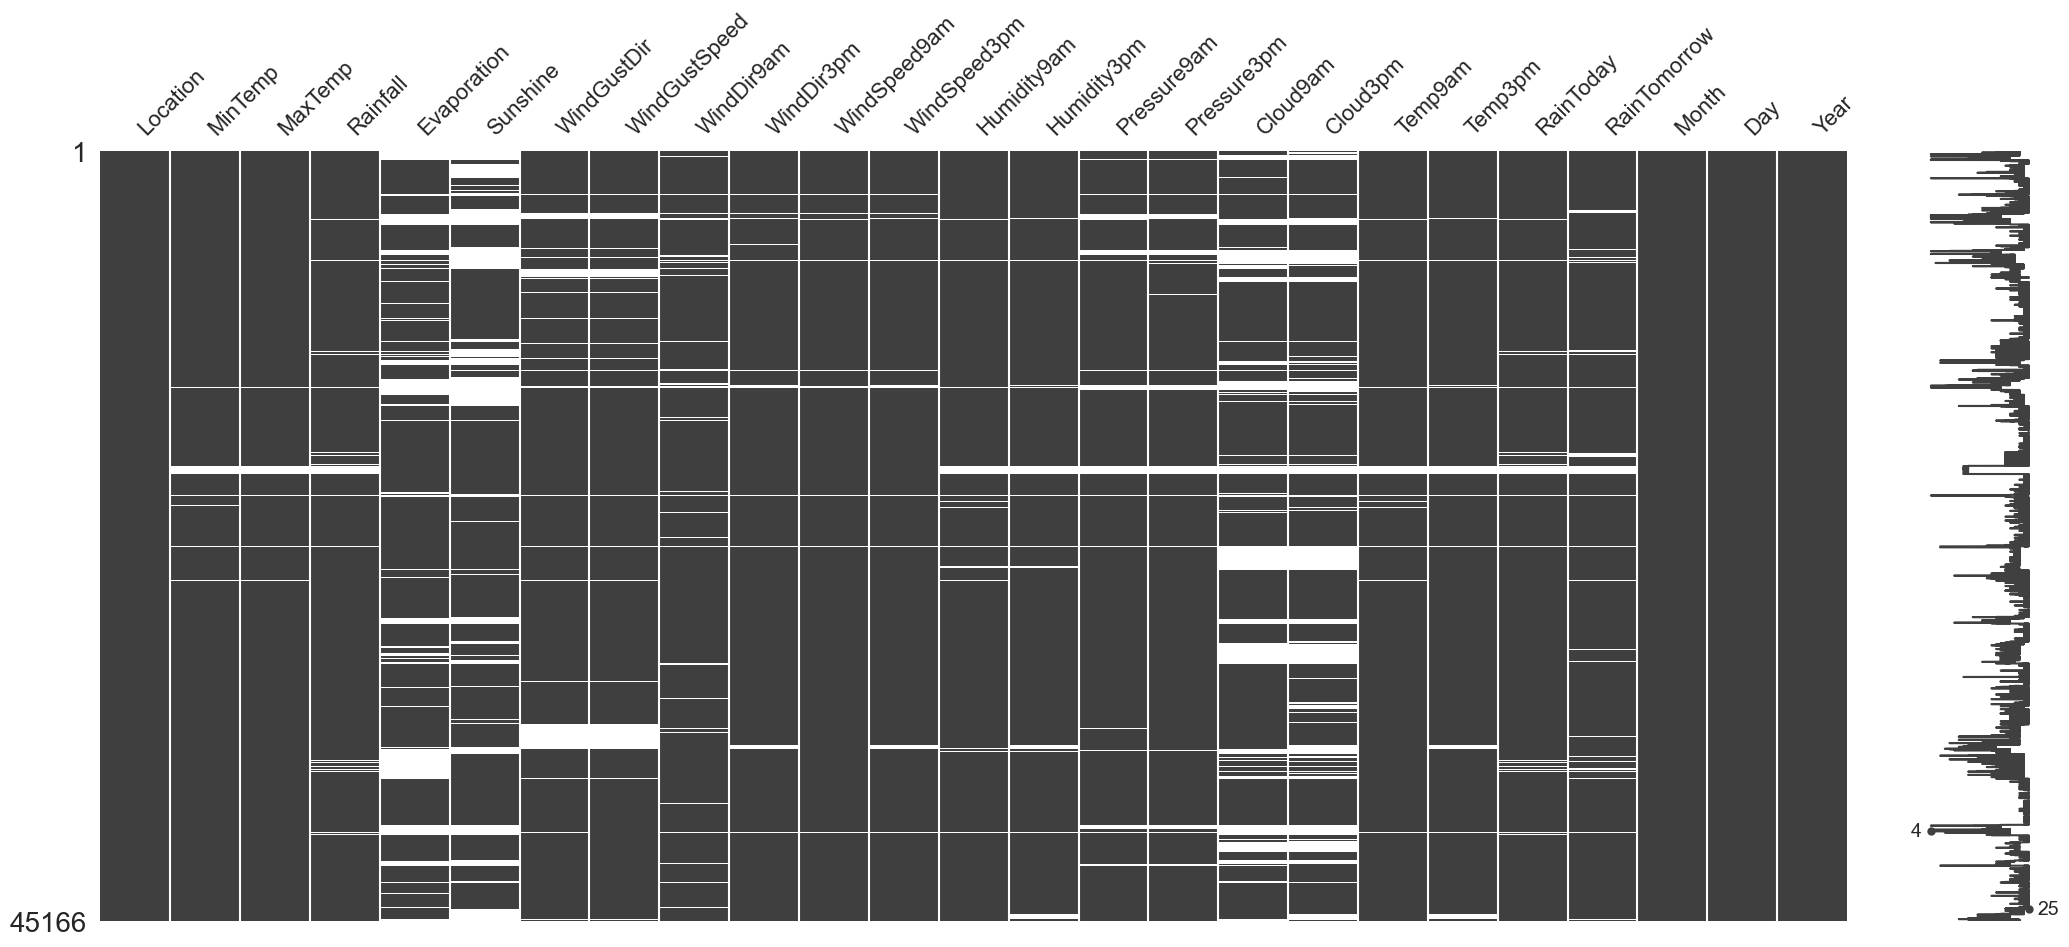

In [19]:
# Find the rows with missing values in the variables Evaporation and Sunshine

mask = rain_data['Evaporation'].isna() & rain_data['Sunshine'].isna()

# Select the indexes of the rows with missing values
indices_with_na = rain_data[mask].index

# Calculate the number of rows to remove
num_to_remove = int(0.8 * len(indices_with_na))

# Select randomly the indexes of the rows to remove
indices_to_remove = np.random.choice(indices_with_na, num_to_remove, replace=False)

# Delete the rows with missing values
rain_data.drop(indices_to_remove, inplace=True)

msno.matrix(rain_data)
missing_data = create_missing_data_frame()
print(f'Shape of the data: {rain_data.shape}')
missing_data

# Impute the rest of values

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_dataset(data):
    # Separate numerical and categorical columns
    df = data.copy()
    categorical_cols = df.select_dtypes(include=['object']).columns
    numerical_cols = df.select_dtypes(exclude=['object']).columns
    
    # Imputation for numerical variables using MICE with KNN
    mice_imputer = IterativeImputer(estimator=KNeighborsRegressor(), initial_strategy='median', max_iter=20, tol=0.01, random_state=42)
    df[numerical_cols] = mice_imputer.fit_transform(df[numerical_cols])
    
    # Round Cloud9am and Cloud3pm after imputation for better interpretation
    cloud_cols = ['Cloud9am', 'Cloud3pm']
    for col in cloud_cols:
        df[col] = df[col].apply(lambda x: min(8, max(0, round(x))))
    
    # Imputation for categorical variables using Random Forest
    for column in categorical_cols:
        rf_imputer = RandomForestClassifier(n_estimators=100, random_state=42)
        non_na_data = df[df[column].notna()]
        na_data = df[df[column].isna()]
        if na_data.empty:
            continue
        rf_imputer.fit(non_na_data.drop(columns=categorical_cols), non_na_data[column])
        imputed_values = rf_imputer.predict(na_data.drop(columns=categorical_cols))
        df.loc[df[column].isna(), column] = imputed_values
    
    return df

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score



def hide_data(df, hide_ratio=0.1):
    """
    Randomly hides data in the DataFrame based on the specified ratio,
    except for the specified columns: 'Sunshine', 'Evaporation', 'Date', and 'Location'.
    """
    df_copy = df.copy()
    # Create a True/False mask for the entire DataFrame
    mask = np.random.rand(*df.shape) < hide_ratio

    # Convert the numpy array mask to a DataFrame to manipulate columns by name
    mask_df = pd.DataFrame(mask, columns=df.columns, index=df.index)

    # Exclude specified columns from the mask by setting them to False
    excluded_columns = ['Sunshine', 'Evaporation', 'Date', 'Location', 'month', 'day', 'year']
    mask_df[excluded_columns] = False

    # Apply the mask to df_copy to hide the data
    df_copy[mask_df] = np.nan
    original_data = df.where(mask_df)
    
    return df_copy, original_data

def evaluate_imputation(df, hide_ratio=0.1):
    df_hidden, original_data = hide_data(df, hide_ratio)
    df_imputed = impute_dataset(df_hidden)
    
    metrics_num = {}
    metrics_cat = {}

    for column in df.columns:
        if column in ['Sunshine', 'Evaporation', 'Date', 'Location', 'month', 'day', 'year']:
            continue
        if df[column].dtype in ['float64', 'int64']:
            valid_index = original_data[column].dropna().index.intersection(df_imputed.index)
            if not valid_index.empty:
                mse = mean_squared_error(original_data[column].loc[valid_index], df_imputed[column].loc[valid_index])
                r2 = r2_score(original_data[column].loc[valid_index], df_imputed[column].loc[valid_index])
                # Storing metrics for each numerical variable
                metrics_num[column] = {
                    'MSE': mse,
                    'R2': r2,
                }
        elif df[column].dtype == 'object':
            valid_index = original_data[column].dropna().index.intersection(df_imputed.index)
            if not valid_index.empty:
                accuracy = accuracy_score(original_data[column].loc[valid_index], df_imputed[column].loc[valid_index])
                f1 = f1_score(original_data[column].loc[valid_index], df_imputed[column].loc[valid_index], average='weighted')
                # Storing metrics for each categorical variable
                metrics_cat[column] = {
                    'Accuracy': accuracy,
                    'F1 Score': f1
                }
    
    return metrics_num, metrics_cat

# Evaluate the imputation performance
evaluate_imputation_dataset = rain_data.copy()
metrics_num, metrics_cat = evaluate_imputation(evaluate_imputation_dataset, hide_ratio=0.1)

# Convert the results to DataFrames for better visualization
df_metrics_num = pd.DataFrame(metrics_num).T
df_metrics_cat = pd.DataFrame(metrics_cat).T

KeyboardInterrupt: 

## PRINT THE IMPUTATION RESULTS

In [ ]:
# Print the results
print("Numerical Variables Imputation Metrics:")
df_metrics_num

Numerical Variables Imputation Metrics:


,MSE,R2
MinTemp,6.735319,0.831018
MaxTemp,4.175295,0.910367
Rainfall,63.028597,0.041128
WindGustSpeed,88.909341,0.579980
WindSpeed9am,53.620938,0.340650
WindSpeed3pm,46.289300,0.427394
Humidity9am,132.812175,0.597438
Humidity3pm,145.659467,0.672682
Pressure9am,12.017023,0.780803
Pressure3pm,11.732107,0.778648


In [ ]:
print("Categorical Variables Imputation Metrics:")
df_metrics_cat

Categorical Variables Imputation Metrics:


,Accuracy,F1 Score
WindGustDir,0.213299,0.206528
WindDir9am,0.229668,0.216856
WindDir3pm,0.233774,0.230352
RainToday,0.969697,0.969905
RainTomorrow,0.795833,0.795886


# IMPUTE THE ORIGINAL DATASET

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<Axes: >

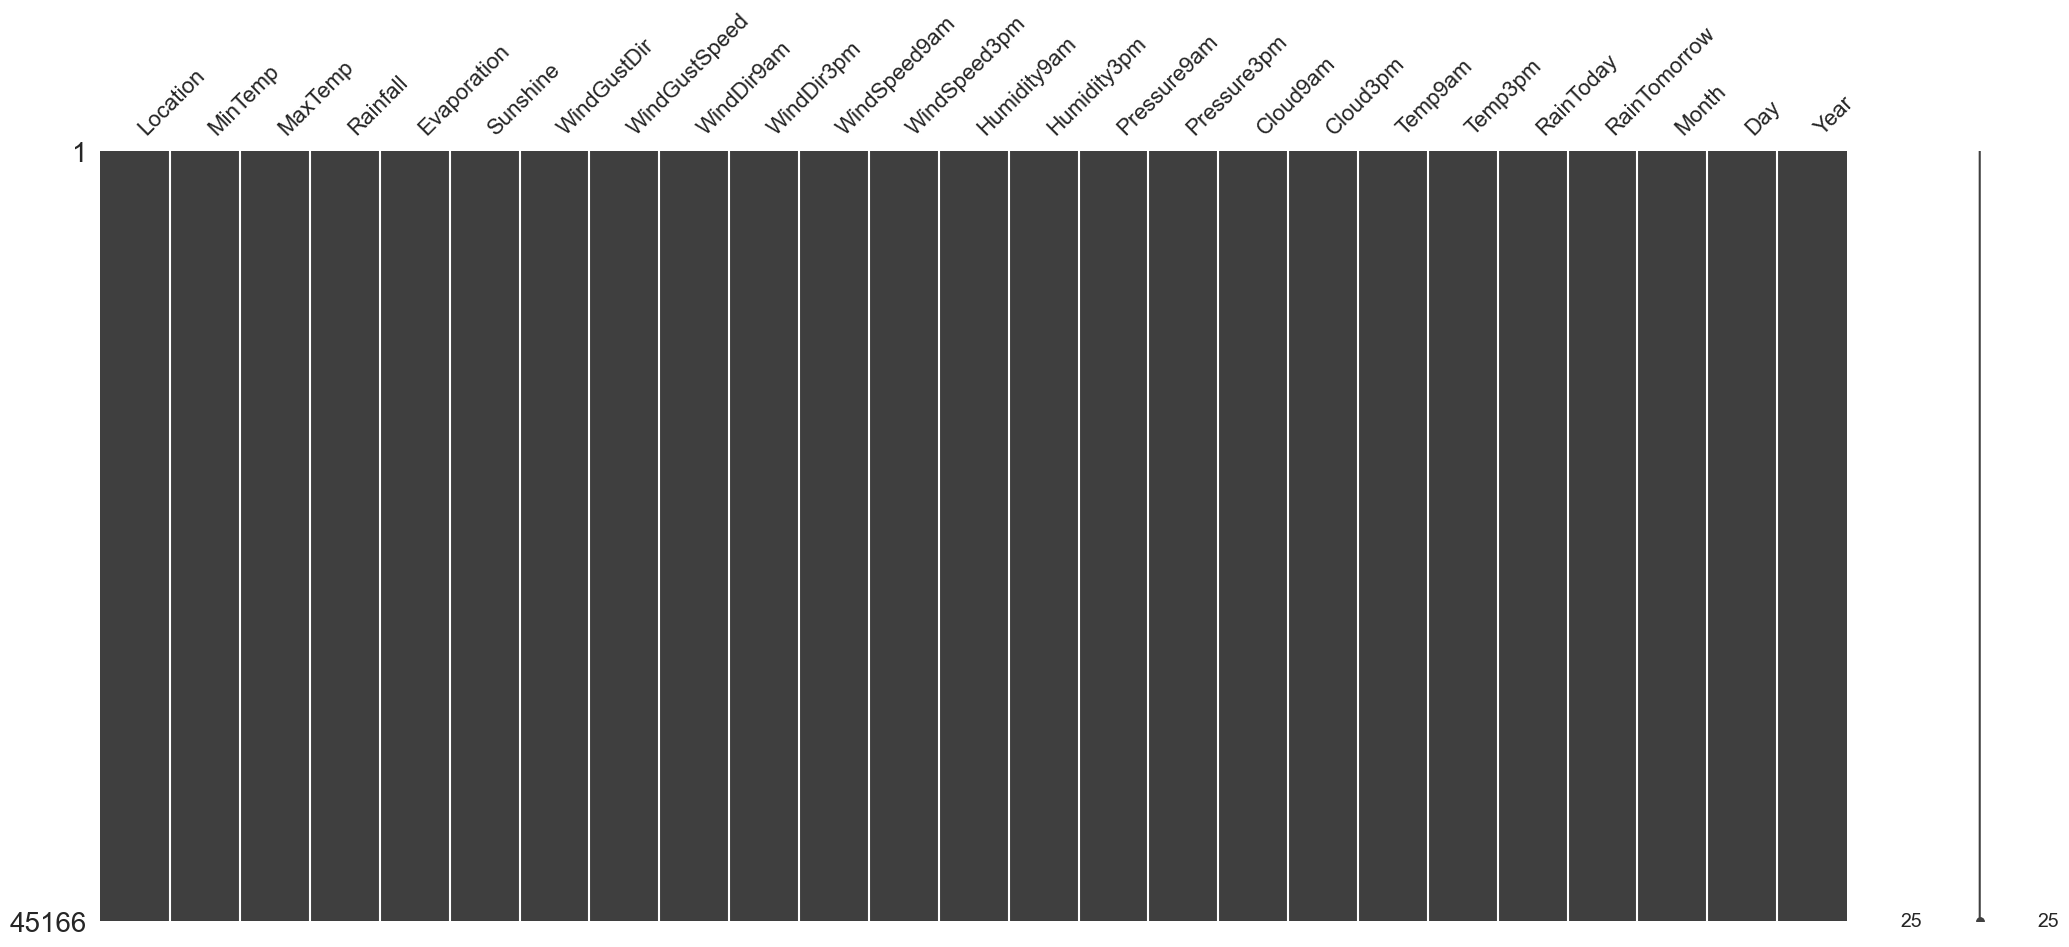

In [21]:
imputed_rain_data = impute_dataset(rain_data)

# Visualize that there are no missing values
msno.matrix(imputed_rain_data)

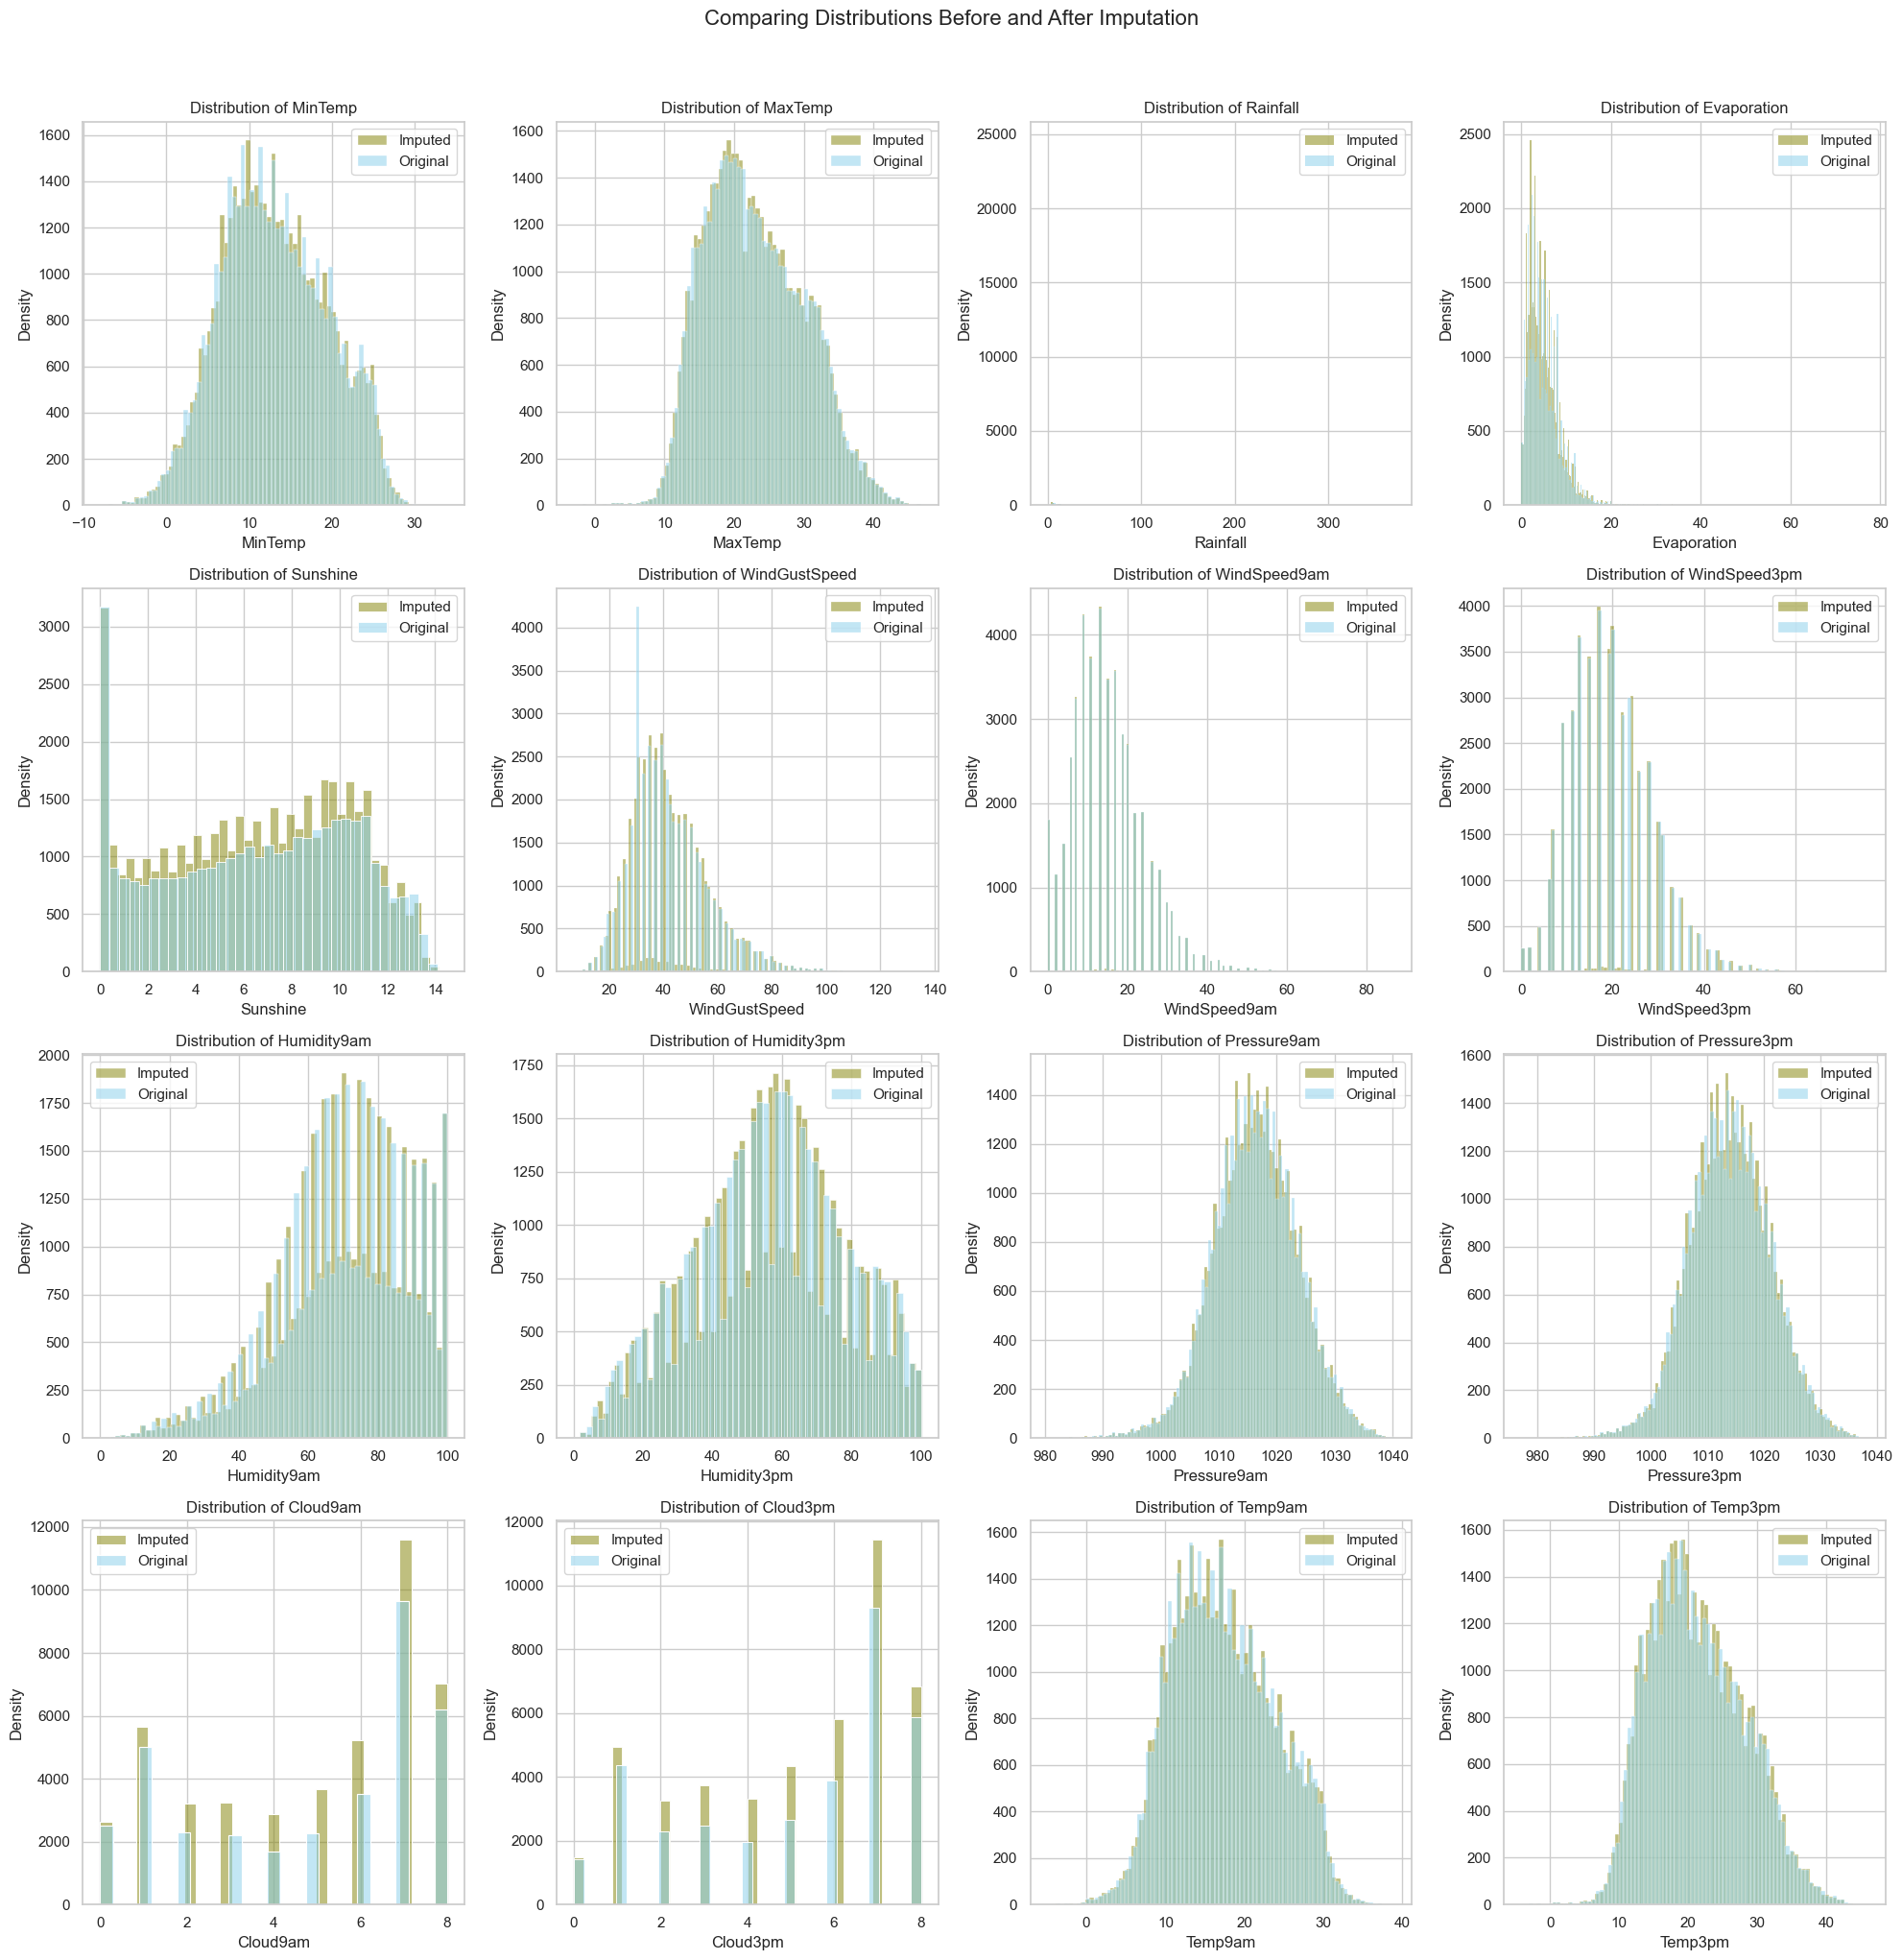

In [22]:
# Configuration of seaborn aesthetics for the plots
sns.set(style="whitegrid")


def compare_distributions(original_df, imputed_df):
    numerical_cols = original_df.select_dtypes(include=['int64', 'float64']).columns
    n_cols = len(numerical_cols)
    n_rows = max(n_cols // 4, 1)
    fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(20, 5 * n_rows))  # Adjust the size of the plot
    fig.suptitle('Comparing Distributions Before and After Imputation', fontsize=16, y=1.02)

    axes = axes.flatten()  # Flatten the 2D array of subplots

    # Iterate over the numerical columns and plot the distributions
    for ax, column in zip(axes, numerical_cols):
        sns.histplot(imputed_df[column], kde=False, color="olive", alpha=0.5, label='Imputed', ax=ax)
        sns.histplot(original_df[column], kde=False, color="skyblue", alpha=0.5, label='Original', ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')
        ax.legend()
    
    # Hide the empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Compare the distributions of the original and imputed data
compare_distributions(rain_data, imputed_rain_data)

# TRAINING ML MODELS

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score



# Separation of the target variable and the features
X = imputed_rain_data.drop('RainTomorrow', axis=1)
y = imputed_rain_data['RainTomorrow']
# Convert the target variable to binary in order to train more easily the models
y = y.replace({'Yes': 1, 'No': 0})
y.astype('int64')

# Division of the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Selection of the categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Creation of the preprocessor with the StandardScaler for numerical variables and OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Models to evaluate

LR_model = LogisticRegression(random_state=42, max_iter=1000)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', LR_model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)

print(f"Logistic Regression:\n Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.2f}", f", F1 Score: {f1:.2f}\n")

Logistic Regression:
 Accuracy: 0.8006, ROC AUC: 0.88 , F1 Score: 0.80



# TRAINING NN MODELS

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import legacy  # Use legacy optimizer if required
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def train_and_visualize_nn(model, X_train, y_train, X_test, y_test, epochs=100, batch_size=32, validation_split=0.2, use_early_stopping=False):
    """
    Trains a neural network model, evaluates it on the test set, and visualizes the training process and results.
    """
    callbacks = []
    if use_early_stopping:
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        callbacks.append(early_stopping)
    
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_split=validation_split, callbacks=callbacks, verbose=1)
    
    # Evaluating the model on the test set
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1_score = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test F1-Score: {test_f1_score:.4f}")

    # Plotting accuracy and loss
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Rain', 'Rain'], yticklabels=['Not Rain', 'Rain'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    return model, history



# Transforming the data using the preprocessor and converting it to a numpy array
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_transformed = pipeline.fit_transform(X_train).toarray()
X_test_transformed = pipeline.transform(X_test).toarray()


## NN with only one layer and SIGMOID activation function
This is the same as training a Logistic Regression model of sklearn with a different optimizer

Epoch 1/250
470/470 [==============================] - 0s 507us/step - loss: 0.5364 - accuracy: 0.7408 - val_loss: 0.4913 - val_accuracy: 0.7653
Epoch 2/250
470/470 [==============================] - 0s 368us/step - loss: 0.4803 - accuracy: 0.7724 - val_loss: 0.4723 - val_accuracy: 0.7738
Epoch 3/250
470/470 [==============================] - 0s 364us/step - loss: 0.4673 - accuracy: 0.7793 - val_loss: 0.4639 - val_accuracy: 0.7795
Epoch 4/250
470/470 [==============================] - 0s 367us/step - loss: 0.4598 - accuracy: 0.7839 - val_loss: 0.4583 - val_accuracy: 0.7824
Epoch 5/250
470/470 [==============================] - 0s 357us/step - loss: 0.4545 - accuracy: 0.7868 - val_loss: 0.4543 - val_accuracy: 0.7862
Epoch 6/250
470/470 [==============================] - 0s 386us/step - loss: 0.4506 - accuracy: 0.7887 - val_loss: 0.4514 - val_accuracy: 0.7883
Epoch 7/250
470/470 [==============================] - 0s 345us/step - loss: 0.4478 - accuracy: 0.7910 - val_loss: 0.4491 - val_ac

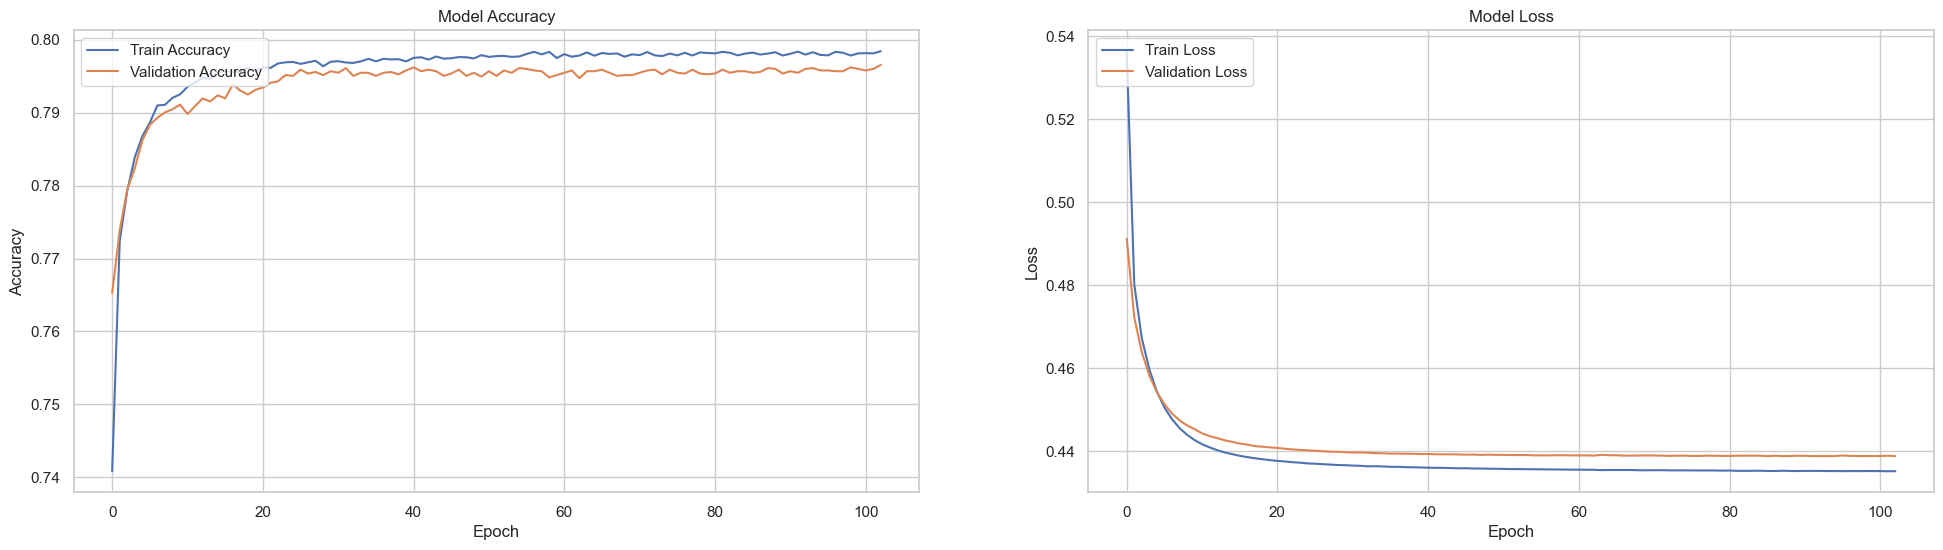

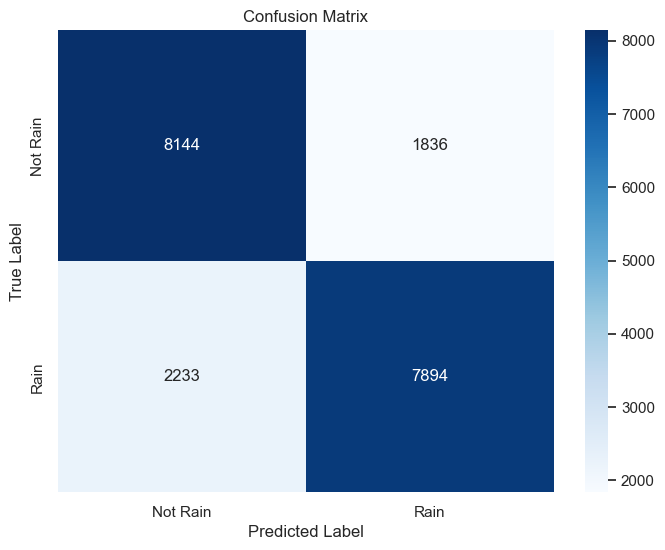

In [12]:
# Build and compile the neural network model wih only one layer and sigmoid activation function

model = Sequential([Dense(1, activation='sigmoid')])
model.compile(optimizer=legacy.Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train and visualize the model
model, history = train_and_visualize_nn(model, X_train_transformed, y_train, X_test_transformed, y_test, epochs=250, batch_size=80, use_early_stopping=True)

## More complex NN structure

Epoch 1/250
470/470 [==============================] - 1s 1ms/step - loss: 1.1370 - accuracy: 0.7069 - val_loss: 0.9363 - val_accuracy: 0.7829
Epoch 2/250
470/470 [==============================] - 1s 1ms/step - loss: 0.9055 - accuracy: 0.7662 - val_loss: 0.7944 - val_accuracy: 0.7873
Epoch 3/250
470/470 [==============================] - 1s 1ms/step - loss: 0.7652 - accuracy: 0.7778 - val_loss: 0.6858 - val_accuracy: 0.7903
Epoch 4/250
470/470 [==============================] - 1s 1ms/step - loss: 0.6665 - accuracy: 0.7863 - val_loss: 0.6052 - val_accuracy: 0.7908
Epoch 5/250
470/470 [==============================] - 1s 1ms/step - loss: 0.6004 - accuracy: 0.7881 - val_loss: 0.5526 - val_accuracy: 0.7933
Epoch 6/250
470/470 [==============================] - 1s 1ms/step - loss: 0.5517 - accuracy: 0.7935 - val_loss: 0.5166 - val_accuracy: 0.7965
Epoch 7/250
470/470 [==============================] - 1s 1ms/step - loss: 0.5216 - accuracy: 0.7954 - val_loss: 0.4909 - val_accuracy: 0.7996

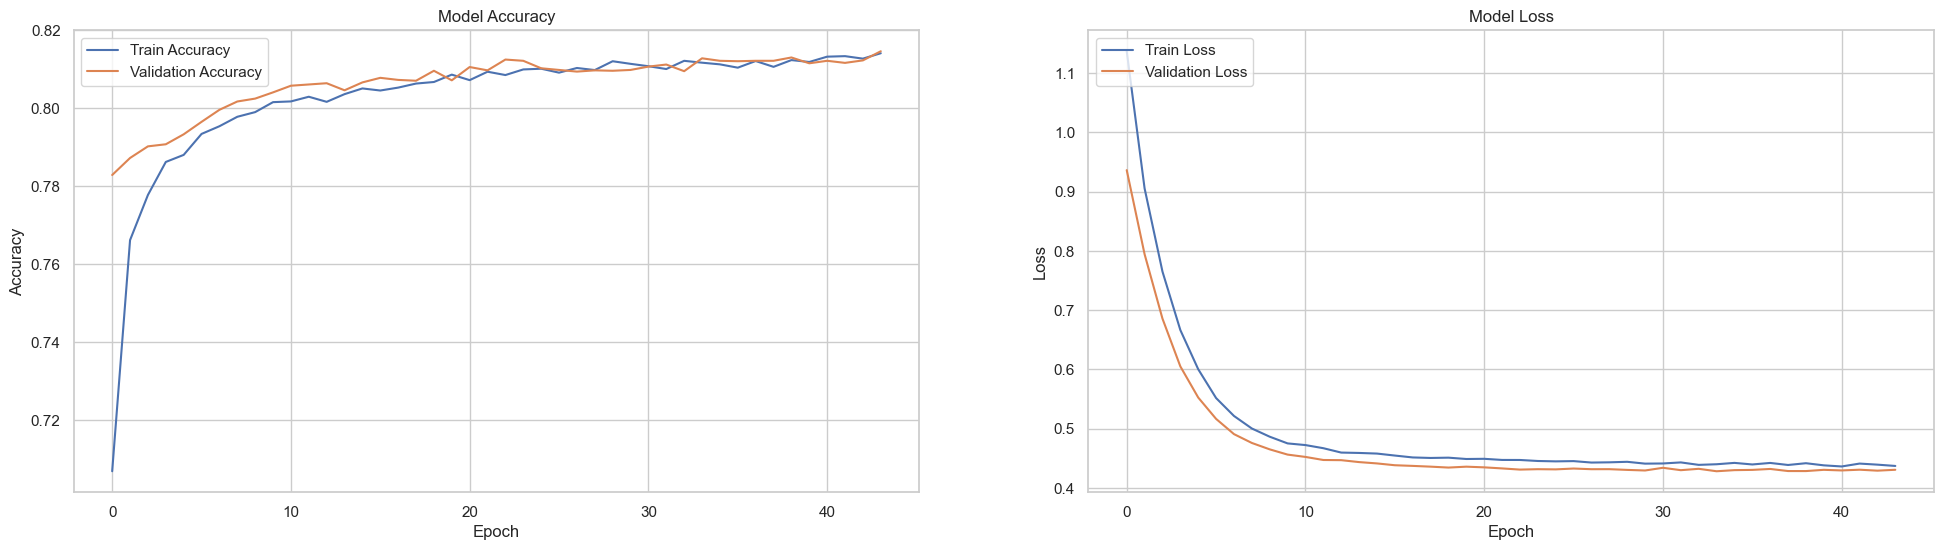

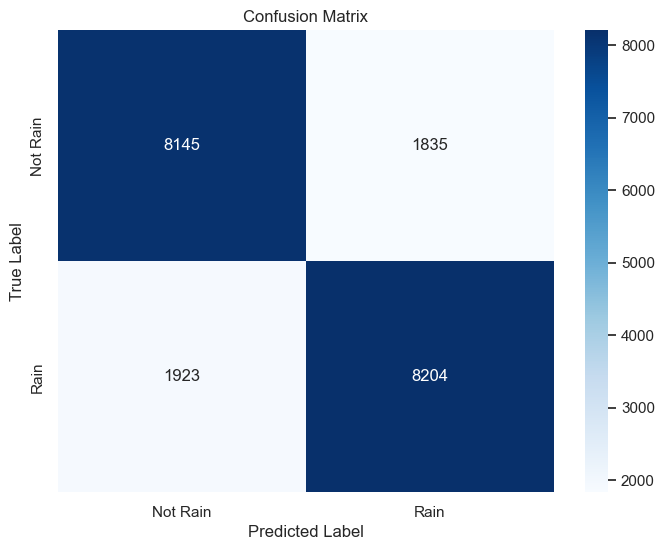

In [13]:
# Configuration of the neural network model

from tensorflow.keras.regularizers import l2

def build_model(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(128, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(64, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# Build and compile the model
model = build_model(X_train_transformed.shape[1])
model.compile(optimizer=legacy.Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train and visualize the model
model, history = train_and_visualize_nn(model, X_train_transformed, y_train, X_test_transformed, y_test, epochs=250, batch_size=80, use_early_stopping=True)